In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Import libraries

In [1]:
!pip install pyvi

You should consider upgrading via the 'C:\Users\ASUS\AppData\Local\Programs\Python\Python38-32\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pyvi import ViTokenizer

## 2. Read data

In [5]:
# Đọc dữ liệu từ file json
data = pd.read_json("data/data_coment_tiki.json")
data.head()

,content,rating
0,"Giao hàng cực nhanh, sáng hôm nay đặt,sáng mai...",5
1,"Đóng gói cẩn thận, điện thoại còn nguyên seal,...",5
2,Mình cho 1 sao vì thái độ dịch vụ Khách hàng t...,1
3,"Sản phẩm tầm giá nhìn cũng đx , mình mua cho p...",3
4,"Màu xanh ở ngoài nhìn đẹp sang, thích hơ...",5


In [6]:
# Đổi nhãn
data.rename(columns={"content":"text","rating":"star"}, inplace=True)
data.head()

,text,star
0,"Giao hàng cực nhanh, sáng hôm nay đặt,sáng mai...",5
1,"Đóng gói cẩn thận, điện thoại còn nguyên seal,...",5
2,Mình cho 1 sao vì thái độ dịch vụ Khách hàng t...,1
3,"Sản phẩm tầm giá nhìn cũng đx , mình mua cho p...",3
4,"Màu xanh ở ngoài nhìn đẹp sang, thích hơ...",5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16115 entries, 0 to 16114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16115 non-null  object
 1   star    16115 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 188.9+ KB


=> Dữ liệu có 16115 phần tử và không có phần tử nào rỗng

## 3. Exploratory Data Analysis (EDA)

### Class distribution (Sự phân bố các lớp)

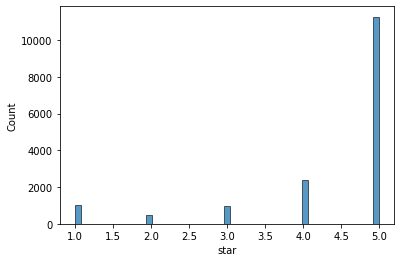

In [8]:
sns.histplot(data=data['star']);

### Do dữ liệu bị mất cân bằng nên ta xóa ngẫu nhiên 10000 mẫu 5 sao, và 1000 mẫu 4 sao

In [9]:
np.random.seed(10)
remove_n = 10000
drop_indices = np.random.choice(data[data['star'] == 5].index, remove_n, replace=False)
data = data.drop(drop_indices)

In [10]:
np.random.seed(10)
remove_n = 1000
drop_indices = np.random.choice(data[data['star'] == 4].index, remove_n, replace=False)
data = data.drop(drop_indices)

In [11]:
len(data)

5115

### Sự phân bố các lớp sau khi cân bằng dữ liệu

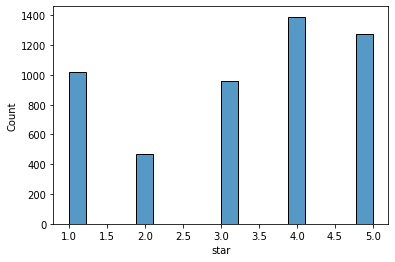

In [16]:
sns.histplot(data=data['star']);

## 4. Data cleaning

### Xóa HTML

In [17]:
import re
def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)
 
txt = "<p class=\"par\">This is an example</p>"
remove_html(txt)

'This is an example'

### Chuẩn hóa unicode

In [18]:
# Chuẩn hóa unicode sang chuẩn unicode dựng sẵn
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic


dicchar = loaddicchar()


def covert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [19]:
'Đức' == 'Đức'

False

In [20]:
covert_unicode('Đức') == 'Đức'

True

### Thay thế từ viết tắt

In [22]:
acronym_words = []
acronym_words_dict = []
acronym_words = open('data/acronym_word.txt','r', encoding='utf-8')
acronym_words = acronym_words.readlines()
for i in range(len(acronym_words)):
  acronym_words_split = acronym_words[i].split("\t")
  for j in range(len(acronym_words_split)):
    acronym_words_split[j] = re.sub("[\n\ufeff]",'',acronym_words_split[j])
  try:
    acronym_words_dict.append({acronym_words_split[0]:acronym_words_split[1]})
  except: 
    pass

acronym_words_dict[:5]


[{'ship': 'vận chuyển'},
 {'shop': 'cửa hàng'},
 {'m': 'mình'},
 {'mik': 'mình'},
 {'ko': 'không'}]

In [23]:
# Sử dụng bộ từ điển để thay thế các kiểu gõ dấu và viết tắt
def replace_acronyms(text):
  text_list = text.split(" ");
  for i in range(len(text_list)):
    for j in range(len(acronym_words_dict)):
      key = list(acronym_words_dict[j].keys())[0]
      value = list(acronym_words_dict[j].values())[0]
      if text_list[i] == key:
        text_list[i] = value
  return " ".join(text_list)

### Xóa từ dừng

In [25]:
stop_words = []
stop_words = open('data/stop_word.txt','r', encoding='utf-8')
stop_words = stop_words.readlines()
for i in range(len(stop_words)):
  stop_words[i] = re.sub("[\t\n\ufeff]",'',stop_words[i])

stop_words[:5]

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy']

In [26]:
# Loại bỏ stop word
def remove_stop_word(text):
  split_word = text.split(" ");
  words = []
  for word in split_word:
    if word not in stop_words:
      words.append(word)
  return " ".join(words)

### Chuẩn hoá câu

In [27]:
def standardize_data(row):
    # Xóa dấu chấm, phẩy, hỏi ở cuối câu
    row = re.sub(r"[\.,\?]+$-", "", row)

    # Xóa tất cả dấu chấm, phẩy, chấm phẩy, chấm thang, ... trong câu
    row = row.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ") \
        .replace("-", " ").replace("?", " ")
    
    # Xóa các kí tự đặc biệt
    row = re.sub("\W",' ', row) 

    # Xóa các đường link
    row = re.sub('https?://\S+|www\.\S+', ' ', row)

    # Xóa các số
    row = re.sub('\w*\d\w*', '', row)

    #Xóa các kí tự xuống dòng
    row = " ".join(re.sub("\n", " ", row).split())

    row = row.strip().lower()
    
    return row

### Xử lý các từ viết trùng lắp

In [28]:
def remove_loop_char(text):
  text = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), str(text), flags=re.IGNORECASE)
  text = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',text)
  return text

### Tách từ

In [29]:
def sementation(text):
  return ViTokenizer.tokenize(text)

### Hàm tổng hợp tiền xử lý dữ liệu

In [30]:
"""**Tiền xử lý dữ liệu**"""
# Làm sạch dữ liệu
def text_prosessing(text):
    # Chuyển đổi thành chữ thường
    text = text.lower() 

    # Xóa các đoạn mã HTML
    text = remove_html(text)

    # chuyển unicode tổ hợp sang chuẩn unicode dựng sẵn
    text = covert_unicode(text)

    # Thay thế từ viết tắt
    text = replace_acronyms(text)

    # Xóa từ dừng
    # text = remove_stop_word(text)

    # Chuẩn hóa câu
    text = standardize_data(text)

    # Xử lý các từ viết trùng lắp
    text = remove_loop_char(text)

    # tách từ
    text = sementation(text)

    return text

### Apply vào dữ liệu của chúng ta

In [31]:
# Apply vào data
data['text'] = data['text'].apply(text_prosessing)

In [32]:
data.head()

,text,star
2,mình cho sao vì thái_độ dịch_vụ khách_hàng tại...,1
3,sản_phẩm tầm giá nhìn cũng đx mình mua cho pa ...,3
6,sản_phẩm mình mua được giao nhanh nhận hàng kh...,1
7,điện_thoại ổn gói dịch_vụ bảo_vệ thiết_bị di_đ...,3
8,đóng_gói cẩn_thận giao đúng lúc giờ đúng sản_p...,4


In [33]:
data['text'].iloc[17]

'sản_phẩm phù_hợp với mức giá nhưng phụ_kiện đi kèm thiếu tai_nghe ốp và dán màn_hình'

## 5. Build Model

In [34]:
len(data[data['star'] < 4])

2451

In [35]:
len(data[data['star'] >= 4])

2664

### Gộp 3 đánh giá 1 2 3 sao là đánh giá tiêu cực với nhãn là 0, 2 đánh giá 4 5 sao là tích cực với nhãn là 1

In [30]:
data["star"] = data["star"].map({1:0, 2:0, 3:0, 4:1, 5:1})

### Our current data (Dữ liệu hiện tại của chúng ta sẽ trong như sau)

In [36]:
data.head(5)

,text,star
2,mình cho sao vì thái_độ dịch_vụ khách_hàng tại...,1
3,sản_phẩm tầm giá nhìn cũng đx mình mua cho pa ...,3
6,sản_phẩm mình mua được giao nhanh nhận hàng kh...,1
7,điện_thoại ổn gói dịch_vụ bảo_vệ thiết_bị di_đ...,3
8,đóng_gói cẩn_thận giao đúng lúc giờ đúng sản_p...,4


In [37]:
np.array(data['text'])[:2]

array(['mình cho sao vì thái_độ dịch_vụ khách_hàng tại tiki lần này mình đặt điện_thoại lần mất gần tuần mới nhận được hàng lần đầu đặt bị trễ lịch hẹn giao tiki gửi thông_báo xin_lỗi và hẹn giao lại sau ngày làm_việc dù đang rất cần nhưng mình vẫn kiên_nhẫn đợi sau ngày làm_việc tiki không_những không giao hàng mà_lại còn âm_thầm_hủy_đơn của mình không hề có cuộc điện_thoại thông_báo hay xin_lỗi mình gọi lên tổng_đài gặp trúng bạn chăm_sóc khách_hàng thái_độ rất tệ giọng như buồn_ngủ không biết cách nói_chuyện với khách_hàng hỏi thì chỉ nói do hoàn_cảnh nên không giao hàng bạn không giải_thích lý_do vì_sao hủy_đơn không hỏi ý_kiến khách và cũng không làm_khách nguôi giận dù mình rất dễ_tính sau đó mình được cho mã giảm bù lại nhưng giá điện_thoại khi đó tăng lên dù giảm vẫn cao hơn lúc đầu mình đặt mua vậy tặng lại mã cho khách làm gì đặt lần mình chờ ngày cuối_cùng cũng cầm được cái điện_thoại rất thất_vọng thái_độ phục_vụ của tiki làm khách_hàng trung_thành tiki bao lần mà lần này n

In [38]:
X = data['text']
y = data['star']

In [39]:
X.head(3)

2    mình cho sao vì thái_độ dịch_vụ khách_hàng tại...
3    sản_phẩm tầm giá nhìn cũng đx mình mua cho pa ...
6    sản_phẩm mình mua được giao nhanh nhận hàng kh...
Name: text, dtype: object

In [40]:
y.head()

2    1
3    3
6    1
7    3
8    4
Name: star, dtype: int64

### Sử dụng các giải thuật máy học để huấn luyện mô hình và nghi thức đánh giá K-Fold

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

#### Dùng thư viện Count Vectorizer để vector hóa dữ liệu văn bản 

In [42]:
cv = CountVectorizer()
X_vectors = cv.fit_transform(X)

In [43]:
print(X_vectors.shape)

(5115, 5306)


In [44]:
print(len(cv.get_feature_names()))
print(X_vectors.todense().shape)
print(X_vectors.todense()[0].shape)
print(len(X))

5306
(5115, 5306)
(1, 5306)
5115


In [45]:
print(X_vectors.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [49]:
# print(cv.vocabulary_)

#### Huấn luyện mô hình bằng DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.7270769630626223


#### Huấn luyện mô hình bằng KNeighborsClassifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.6905160683708415


#### Huấn luyện mô hình bằng MultinomialNB

In [44]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.8048927501223092


#### Huấn luyện mô hình bằng RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.8072342068248533


#### Huấn luyện mô hình bằng SVM

In [48]:
from sklearn.svm import SVC

model = SVC()
total_accuracy = cross_val_score(model, X_vectors, y, cv=10, scoring='accuracy')
print('Accuracy:', np.mean(total_accuracy))

Accuracy: 0.49539926308708415


### <strong>Kết quả huấn luyện</strong>

<strong>Lần đầu</strong>

DecisionTreeClassifier 71.04%

KNeighborsClassifier 65.37%

MultinomialNB 78.47%

RandomForestClassifier 78.43%

SVC 78.61%

Giải thuật SVC cho kết quả tốt nhất với độ chính xác 78.61%

<strong>Lần 2 Khi không loại bỏ từ dừng</strong>

DecisionTreeClassifier 72.70%

KNeighborsClassifier 69.05%

MultinomialNB 80.48%

RandomForestClassifier 80.72%

SVC 81.44%

Giải thuật SVC cho kết quả tốt nhất với độ chính xác 81.44%

=> Khi không loại bỏ từ dừng thì độ chính xác thu được sẽ cao hơn

### Lưu model
Model được lưu lại thành file pickle được sử dụng để viết chương trình dự đoán

In [47]:
from sklearn.metrics import accuracy_score
import pickle

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [49]:
len(X_train), len(X_test)

(4603, 512)

In [50]:
cv = CountVectorizer()
X_train_vector = cv.fit_transform(X_train)
X_test_vector = cv.transform(X_test)
svc_model = SVC()
svc_model.fit(X_train_vector, y_train)

y_pred = svc_model.predict(X_test_vector)
print('accuracy_score:', accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy_score: 0.810546875


Không gian vector của tập dữ liệu train

In [51]:
print(len(cv.get_feature_names()))
print(X_train_vector.shape)
print(X_test_vector.shape)

5065
(4603, 5065)
(512, 5065)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Ghi lại ra file

In [52]:
with open("CountVectorizerAndSVC.pkl", 'wb') as fout:
    pickle.dump((cv, svc_model), fout)

### Đọc model
Model phải được đọc trở lại từ file, sử dụng để viết website

Để chắn chắn rằng vector và model đã được đọc nên ta đặt tên biến khác, đồng thời áp dụng vector hóa lên X

In [53]:
with open('CountVectorizerAndSVC.pkl', 'rb') as file:
    vector, model = pickle.load(file)

In [54]:
X_vector = vector.transform(X)
y_pred = model.predict(X_vector)
print('accuracy_score:', accuracy_score(y_true=y, y_pred=y_pred))

accuracy_score: 0.8999022482893451


### Thử cải thiện mô hình bằng PhoBERT

Tham Khảo từ Phạm Hữu Quang trên viblo: https://viblo.asia/p/bert-roberta-phobert-bertweet-ung-dung-state-of-the-art-pre-trained-model-cho-bai-toan-phan-loai-van-ban-4P856PEWZY3


Cài đặt transformers

In [55]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.1 MB/s 
     |████████████████████████████████| 61 kB 502 kB/s 
     |████████████████████████████████| 3.3 MB 11.0 MB/s 
     |████████████████████████████████| 895 kB 23.7 MB/s 
     |████████████████████████████████| 596 kB 46.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Tải về pre-trained PhoBERT base transformers

In [56]:
!wget https://public.vinai.io/PhoBERT_base_transformers.tar.gz
!tar -xzvf PhoBERT_base_transformers.tar.gz

--2021-12-23 06:24:25--  https://public.vinai.io/PhoBERT_base_transformers.tar.gz
Resolving public.vinai.io (public.vinai.io)... 65.8.49.95, 65.8.49.107, 65.8.49.115, ...
Connecting to public.vinai.io (public.vinai.io)|65.8.49.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322405979 (307M) [application/x-tar]
Saving to: ‘PhoBERT_base_transformers.tar.gz’

PhoBERT_base_transf 100%[===================>] 307.47M  25.6MB/s    in 15s     

2021-12-23 06:24:42 (20.5 MB/s) - ‘PhoBERT_base_transformers.tar.gz’ saved [322405979/322405979]

PhoBERT_base_transformers/
PhoBERT_base_transformers/config.json
PhoBERT_base_transformers/bpe.codes
PhoBERT_base_transformers/model.bin
PhoBERT_base_transformers/dict.txt


Kế tiếp, chúng ta cài đặt fastBPE và FAIRSeq

In [57]:
!pip install fastBPE
!pip install fairseq

  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp37-cp37m-linux_x86_64.whl size=483118 sha256=30985df408ed0d72cddcf28163cf1ad34f02ac10dc98ff231512e8bc23c08222
  Stored in directory: /root/.cache/pip/wheels/bd/d4/0e/0d317a65f77d3f8049fedd8a2ee0519164cf3e6bd77ef886f1
Successfully built fastBPE
     |████████████████████████████████| 1.7 MB 5.4 MB/s 
     |████████████████████████████████| 145 kB 44.7 MB/s 
     |████████████████████████████████| 90 kB 8.7 MB/s 
     |████████████████████████████████| 112 kB 41.1 MB/s 
     |████████████████████████████████| 74 kB 3.0 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=ad3eb4cb366ec5d11f0eb19603eb99f5df2a5da0719d789ed854d24d6e28d8c6
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime


In [58]:
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--bpe-codes', 
    default="/content/PhoBERT_base_transformers/bpe.codes",
    required=False,
    type=str,
    help='path to fastBPE BPE'
)
args, unknown = parser.parse_known_args()
bpe = fastBPE(args)

# Load the dictionary
vocab = Dictionary()
vocab.add_from_file("/content/PhoBERT_base_transformers/dict.txt")

In [59]:
bpe.encode('Hôm_nay trời nóng quá nên tôi ở nhà viết Viblo!')

'Hôm_nay trời nóng quá nên tôi ở nhà viết Vi@@ blo@@ !'

In [60]:
vocab.encode_line('<s> ' + 'Hôm_nay trời nóng quá nên tôi ở nhà viết Vi@@ blo@@ !' + ' </s>')

tensor([    0,  3791,  1027,   898,   204,    77,    70,    25,    69,   467,
         3696, 16856,   381,     2,     2], dtype=torch.int32)

In [61]:
X.head(3)

2    mình cho sao vì thái_độ dịch_vụ khách_hàng tại...
3    sản_phẩm tầm giá nhìn cũng đx mình mua cho pa ...
6    sản_phẩm mình mua được giao nhanh nhận hàng kh...
Name: text, dtype: object

In [62]:
y.head()

2    0
3    0
6    0
7    0
8    1
Name: star, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
train_sents, val_sents, train_labels, val_labels = train_test_split(X.tolist(), y.tolist(), test_size=0.1)

In [64]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LEN = 125

train_ids = []
for sent in train_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    train_ids.append(encoded_sent)

val_ids = []
for sent in val_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    val_ids.append(encoded_sent)
    
train_ids = pad_sequences(train_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
val_ids = pad_sequences(val_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")

In [65]:
train_masks = []
for sent in train_ids:
    mask = [int(token_id > 0) for token_id in sent]
    train_masks.append(mask)

val_masks = []
for sent in val_ids:
    mask = [int(token_id > 0) for token_id in sent]

    val_masks.append(mask)

In [66]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch
train_inputs = torch.tensor(train_ids)
val_inputs = torch.tensor(val_ids)
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)
train_masks = torch.tensor(train_masks)
val_masks = torch.tensor(val_masks)

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=32)

In [67]:
from transformers import RobertaForSequenceClassification, RobertaConfig, AdamW

config = RobertaConfig.from_pretrained(
    "/content/PhoBERT_base_transformers/config.json", from_tf=False, num_labels = 2, output_hidden_states=False,
)
BERT_SA = RobertaForSequenceClassification.from_pretrained(
    "/content/PhoBERT_base_transformers/model.bin",
    config=config
)

You are using a model of type bert to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at /content/PhoBERT_base_transformers/model.bin were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertFor

In [68]:
BERT_SA.cuda()
print('Done')

Done


In [69]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    F1_score = f1_score(pred_flat, labels_flat, average='macro')
    
    return accuracy_score(pred_flat, labels_flat), F1_score

In [70]:
import random
from tqdm import tqdm_notebook
device = 'cuda'
epochs = 10

param_optimizer = list(BERT_SA.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5, correct_bias=False)


for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    total_loss = 0
    BERT_SA.train()
    train_accuracy = 0
    nb_train_steps = 0
    train_f1 = 0
    
    for step, batch in tqdm_notebook(enumerate(train_dataloader)):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        BERT_SA.zero_grad()
        outputs = BERT_SA(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask, 
            labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()
        
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_train_accuracy, tmp_train_f1 = flat_accuracy(logits, label_ids)
        train_accuracy += tmp_train_accuracy
        train_f1 += tmp_train_f1
        nb_train_steps += 1
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(BERT_SA.parameters(), 1.0)
        optimizer.step()
        
    avg_train_loss = total_loss / len(train_dataloader)
    print(" Accuracy: {0:.4f}".format(train_accuracy/nb_train_steps))
    print(" F1 score: {0:.4f}".format(train_f1/nb_train_steps))
    print(" Average training loss: {0:.4f}".format(avg_train_loss))

    print("Running Validation...")
    BERT_SA.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    eval_f1 = 0
    for batch in tqdm_notebook(val_dataloader):

        batch = tuple(t.to(device) for t in batch)

        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = BERT_SA(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask)
            logits = outputs[0]
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            tmp_eval_accuracy, tmp_eval_f1 = flat_accuracy(logits, label_ids)

            eval_accuracy += tmp_eval_accuracy
            eval_f1 += tmp_eval_f1
            nb_eval_steps += 1
    print(" Accuracy: {0:.4f}".format(eval_accuracy/nb_eval_steps))
    print(" F1 score: {0:.4f}".format(eval_f1/nb_eval_steps))
print("Training complete!")

======== Epoch 1 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.7686
 F1 score: 0.7563
 Average training loss: 0.4868
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.8691
 F1 score: 0.8661
======== Epoch 2 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.8387
 F1 score: 0.8332
 Average training loss: 0.3762
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.8633
 F1 score: 0.8612
======== Epoch 3 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.8823
 F1 score: 0.8782
 Average training loss: 0.2963
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.8750
 F1 score: 0.8734
======== Epoch 4 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.9104
 F1 score: 0.9077
 Average training loss: 0.2477
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.8867
 F1 score: 0.8852
======== Epoch 5 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.9260
 F1 score: 0.9237
 Average training loss: 0.2123
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.8672
 F1 score: 0.8656
======== Epoch 6 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.9395
 F1 score: 0.9375
 Average training loss: 0.1728
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.8672
 F1 score: 0.8657
======== Epoch 7 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.9512
 F1 score: 0.9496
 Average training loss: 0.1501
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.8633
 F1 score: 0.8606
======== Epoch 8 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.9646
 F1 score: 0.9633
 Average training loss: 0.1105
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.8691
 F1 score: 0.8675
======== Epoch 9 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.9683
 F1 score: 0.9674
 Average training loss: 0.0958
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.8613
 F1 score: 0.8591
======== Epoch 10 / 10 ========
Training...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


0it [00:00, ?it/s]

 Accuracy: 0.9731
 F1 score: 0.9722
 Average training loss: 0.0862
Running Validation...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/16 [00:00<?, ?it/s]

 Accuracy: 0.8555
 F1 score: 0.8535
Training complete!


<strong>Kết quả huấn luyện lần 1</strong>

Accuracy: 0.7695

F1 score: 0.7616

<strong>Lần 2 khi không xóa từ dừng</strong>

Accuracy: 0.8555

F1 score: 0.8535
